**Created by Berkay Alan**

**Linear Regression**

**19 July 2021**

**For more Tutorial:** https://www.kaggle.com/berkayalan

## Content

- **Linear Methods for Regression**
    - What is Linear Regression?
    - Simple Linear Regression (Theory - Model- Tuning)
    - Multiple Linear Regression (Theory - Model- Tuning)
    - Least-Squares Regression(Ordinary Least Squares) (Theory - Model- Tuning)
    - Principal Component Analysis (PCA) 
    - Principal component regression(PCR) (Theory - Model- Tuning)
    - Shrinkage(Regularization) Methods
        - Partial Least Squares (Theory - Model- Tuning)
        - Ridge Regression(L2 Regularization) (Theory - Model- Tuning)
        - Lasso Regression(L1 Regularization) (Theory - Model- Tuning)
        - Elastic Net Regression (Theory - Model- Tuning)


## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 

- [**Linear Regression by Yale University**](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)

- [**An introduction to simple linear regression**](https://www.scribbr.com/statistics/simple-linear-regression/)

- [**An introduction to Multiple linear regression**](https://www.scribbr.com/statistics/multiple-linear-regression/)

- [**How to Develop Elastic Net Regression Models in Python**](https://machinelearningmastery.com/elastic-net-regression-in-python/)

- [**Linear Regression for Machine Learning**](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

- [**Applied Data Mining and Statistical Learning by the PennState University**](https://online.stat.psu.edu/stat508/lesson/7/7.1)

- [**How to Calculate Principal Component Analysis (PCA) from Scratch in Python**](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)

- [**Validating your Machine Learning Model**](https://towardsdatascience.com/validating-your-machine-learning-model-25b4c8643fb7)

- [**Understanding Confusion Matrix**](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

- [**Shrinkage methods by Stanford**](https://web.stanford.edu/class/stats202/notes/Model-selection/Shrinkage.html)

- [**Partial Least Squares regression by Xlstat**](https://www.xlstat.com/en/solutions/features/partial-least-squares-regression)

- [**Ridge Regression by Statquest**](https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer)

- [**Lasso Regression by Statquest**](https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer)

- [**Elastic Net Regression by Statquest**](https://www.youtube.com/watch?v=1dKRdX9bfIo&ab_channel=StatQuestwithJoshStarmer)

- [**Regularization: Ridge, Lasso and Elastic Net by Datacamp**](https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net)

## Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import statsmodels.api as sm

In [6]:
import statsmodels.formula.api as smf

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [10]:
from sklearn.decomposition import PCA

In [11]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [12]:
from sklearn.preprocessing import scale

In [13]:
from sklearn import model_selection

In [244]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [245]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

## Linear Methods for Regression

A linear regression model assumes that the regression function E(Y |X) is linear in the inputs X1,...,Xp. Linear models were largely developed in the precomputer age of statistics, but even in today’s computer era there are still good reasons to study and use them. They are simple and often provide an adequate and interpretable description of how the inputs affect the output. 

### What is Linear Regression?

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

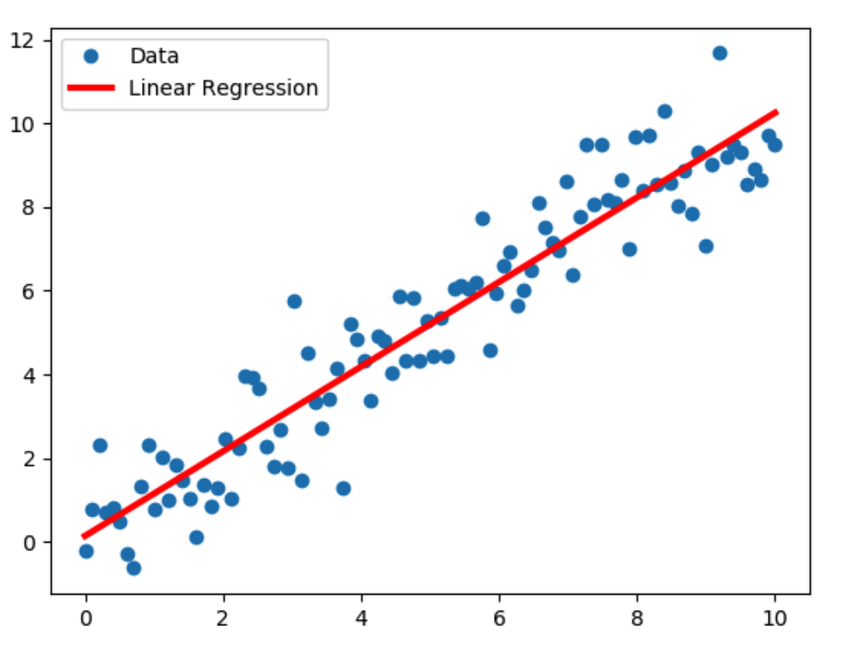

This image is cited by: https://www.researchgate.net/profile/Hieu-Tran-17/publication/340271573/figure/fig3/AS:874657431437319@1585545990533/Linear-Regression-model-sample-illustration.ppm

### Simple Linear Regression

#### Theory

Simple linear regression is used to estimate the relationship between two quantitative variables. We can use simple linear regression when WE want to know:

1. How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion).

2. The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).

**Example** 

I am a social researcher interested in the relationship between income and happiness. I survey 500 people whose incomes range from *$15k* to *$125k* and ask them to rank their happiness on a scale from 1 to 10.

My independent variable (income) and dependent variable (happiness) are both quantitative, so I can do a regression analysis to see if there is a linear relationship between them.

#### Model

For a real world example, we will use *advertising* dataset.

It can be downloaded from here: https://www.kaggle.com/ashydv/advertising-dataset

We will understand the dataset first.

In [16]:
ads = pd.read_csv("Advertising.csv")

In [17]:
ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [18]:
ads = ads[['TV', 'radio', 'newspaper', 'sales']]

In [19]:
ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
ads.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [21]:
ads.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [22]:
ads.shape

(200, 4)

In [23]:
ads.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Let's see correlations between variables.

In [24]:
ads.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Let's see correlations in pairplot.

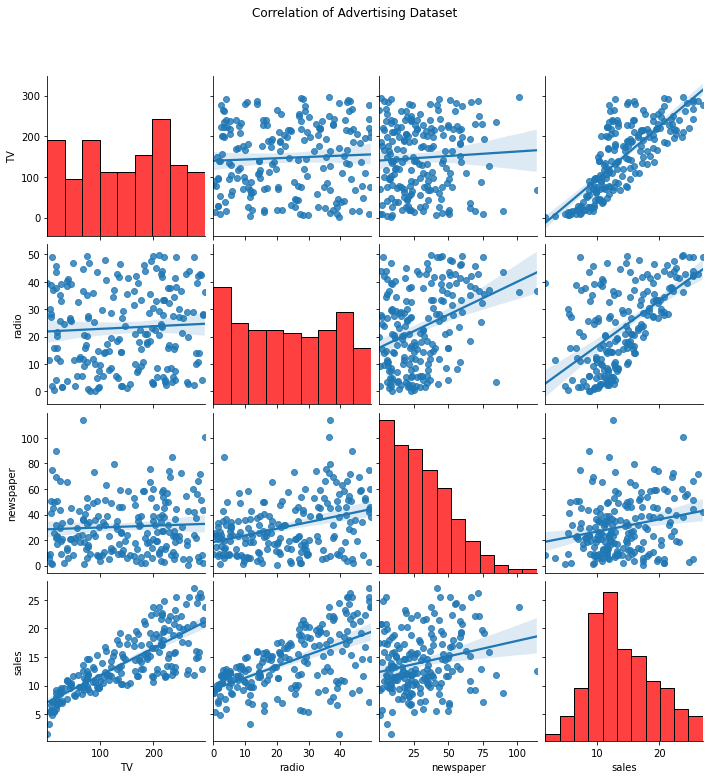

In [25]:
g= sns.pairplot(ads,kind="reg",diag_kws= {'color': 'red'})

g.fig.suptitle("Correlation of Advertising Dataset", y=1.08)

plt.show()

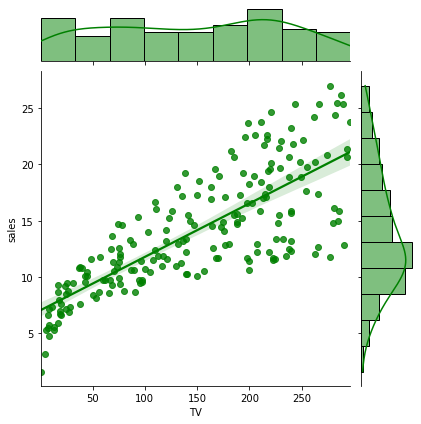

In [26]:
sns.jointplot(x="TV", y="sales",data=ads,kind="reg",color="green")

plt.show()

Now we will create a simple linear regression model by using **statsmodel** library.

In [27]:
X = ads.TV
X = sm.add_constant(X) # It will add a constant to X.
X.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [28]:
y = ads.sales # Dependent Variable -Target

In [29]:
slr = sm.OLS(y,X) 

In [30]:
model = slr.fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        07:16:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model.params # Main parameters

const    7.032594
TV       0.047537
dtype: float64

In [33]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [34]:
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [35]:
#Signifigant Level - P value

model.f_pvalue

1.467389700194647e-42

In [36]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [37]:
model.fvalue

312.144994372713

In [38]:
model.tvalues

const    15.360275
TV       17.667626
dtype: float64

In [39]:
#Sum of squares error of model

model.mse_model #This is very bad

3314.618166868649

In [40]:
model.rsquared

0.611875050850071

In [41]:
model.rsquared_adj

0.6099148238341623

In [42]:
#Predicted Values
model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [43]:
#real values
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [44]:
#Manual formula of our model
print("Sales: " , model.params[0] , "+ (TV*",model.params[1],")")

Sales:  7.032593549127695 + (TV* 0.04753664043301975 )


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


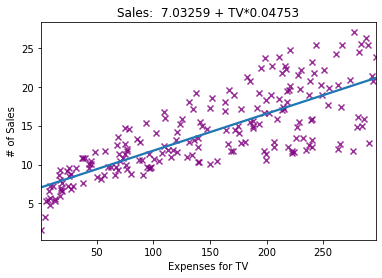

In [45]:
ax = sns.regplot(ads["TV"],ads["sales"],ci=None,scatter_kws={"color":"purple"},marker="x")
ax.set_title("Sales:  7.03259 + TV*0.04753")
ax.set_ylabel("# of Sales")
ax.set_xlabel("Expenses for TV")

plt.show()

Now we will create a model with **sklearn** library.

In [46]:
X = ads[["TV"]]
sm.add_constant(X)
y = ads["sales"]

In [47]:
lr = LinearRegression()
model = lr.fit(X,y)

In [48]:
model.coef_.item()

0.047536640433019764

In [49]:
model.intercept_

7.032593549127693

In [50]:
model.score(X,y) #R Squared

0.611875050850071

In [51]:
model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

Let's predict a spesific value.

In [52]:
model.predict([[20]])

array([7.98332636])

In [53]:
model.predict([[43],[20],[32]])

array([9.07666909, 7.98332636, 8.55376604])

#### Residuals

In [54]:
slr = sm.OLS(y,X) 
model = slr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                   3.52e-100
Time:                        07:16:40   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
mean_square = mean_squared_error(y,model.fittedvalues)
mean_square

23.0395966795387

In [56]:
rmse = np.sqrt(mean_square)
rmse

4.799957987268087

In [57]:
results = pd.DataFrame({"Real": y, "Prediction": model.predict(X),
                        "Residuals": y -(model.predict(X)),
                        "Square of Residuals": (y -(model.predict(X)))**2})

In [58]:
results.head(10)

,Real,Prediction,Residuals,Square of Residuals
0,22.1,19.155735,2.944265,8.668697
1,10.4,3.704608,6.695392,44.828280
2,9.3,1.431893,7.868107,61.907104
3,18.5,12.612316,5.887684,34.664826
4,12.9,15.051529,-2.151529,4.629078
5,7.2,0.724272,6.475728,41.935058
6,11.8,4.786853,7.013147,49.184238
7,13.2,10.006603,3.193397,10.197785
8,4.8,0.715947,4.084053,16.679492
9,10.6,16.633272,-6.033272,36.400369


In [59]:
np.sum(results["Square of Residuals"]) # root mean_square error

4607.91933590774

In [60]:
np.mean(results["Square of Residuals"]) # mean_square error

23.03959667953869

In [61]:
model.resid[:10]

0    2.944265
1    6.695392
2    7.868107
3    5.887684
4   -2.151529
5    6.475728
6    7.013147
7    3.193397
8    4.084053
9   -6.033272
dtype: float64

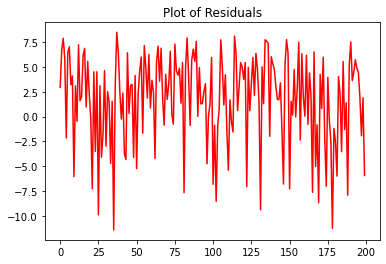

In [62]:
plt.plot(model.resid,c="r")
plt.title("Plot of Residuals")
plt.show()

### Multiple Linear Regression

#### Theory

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. You can use multiple linear regression when you want to know:

1. How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).
2. The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).

**Note:** In multiple linear regression, it is possible that some of the independent variables are actually correlated with one another, so it is important to check these before developing the regression model. If two independent variables are too highly correlated (r2 > ~0.6), then only one of them should be used in the regression model.

**Example**

You are a public health researcher interested in social factors that influence heart disease. You survey 500 towns and gather data on the percentage of people in each town who smoke, the percentage of people in each town who bike to work, and the percentage of people in each town who have heart disease.

Because you have two independent variables and one dependent variable, and all your variables are quantitative, you can use multiple linear regression to analyze the relationship between them.

#### Model

For a real world example, we will use *advertising* dataset.

It can be downloaded from here: https://www.kaggle.com/ashydv/advertising-dataset

We will understand the dataset first.

In [63]:
ads = pd.read_csv("advertising.csv")
ads = ads[['TV', 'radio', 'newspaper', 'sales']]
ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [64]:
ads.shape

(200, 4)

Let's select all independent variables.

In [65]:
X = ads.drop("sales",axis=1)
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


Now we will select dependent variable.

In [66]:
y = ads["sales"]
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

Now we will split our dataset as train and test set.

In [67]:
ads.shape

(200, 4)

In [68]:
X_train = X.iloc[:160]
X_test = X.iloc[160:]
y_train = y[:160]
y_test = y[160:]

In [69]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (160, 3)
X_test Shape:  (40, 3)
y_train Shape:  (160,)
y_test Shape:  (40,)


First we will create our model with **statsmodel**.

Rsquare is explanation rate. Results means we explain 0.98 of sales variable.

In [70]:
mlr = sm.OLS(y_train,X_train)
model = mlr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2856.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                   1.07e-136
Time:                        07:16:40   Log-Likelihood:                         -338.90
No. Observations:                 160   AIC:                                      683.8
Df Residuals:                     157   BIC:                                      693.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0550      0.002     36.244      0.000       0.052       0.058
radio          0.2146      0.011     20.027      0.000       0.193       0.236
newspaper      0.0173      0.007      2.331      0.021       0.003       0.032
==============================================================================
Omnibus:                        5.571   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                6.050
Skew:                          -0.272   Prob(JB):                       0.0485
Kurtosis:                       3.782   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we will create our model with **sklearn**.

In [71]:
mlr = LinearRegression()
model = mlr.fit(X_train,y_train)

In [72]:
print("Intercept of Model-Bias: ",model.intercept_)
print("Coefficients of Model: ",model.coef_)

Intercept of Model-Bias:  2.9490110405821124
Coefficients of Model:  [ 0.0472521   0.179922   -0.00094408]


In [73]:
print("Sales:", model.intercept_ ," + ",
      model.coef_[0],"* TV +",
      model.coef_[1],"* Radio +",
      model.coef_[2],"* Newspaper")

Sales: 2.9490110405821124  +  0.047252095373716226 * TV + 0.17992200017716242 * Radio + -0.0009440773964715451 * Newspaper


#### Prediction

Let's predict a spesific value.

In [74]:
model.predict(pd.DataFrame([[35],[20],[45]]).T).item()

8.15879089936421

In [75]:
train_root_mean_square = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

In [76]:
print("root_mean_square_error of Training Set: ",train_root_mean_square)

root_mean_square_error of Training Set:  1.6798191851735351


In [77]:
test_root_mean_square = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

In [78]:
print("root_mean_square_error of Test Set: ",test_root_mean_square)

root_mean_square_error of Test Set:  1.6706720762245335


#### Model Tuning

In [79]:
X = ads.drop("sales",axis=1)
y = ads["sales"]

X_train = X.iloc[:160]
X_test = X.iloc[160:]
y_train = y[:160]
y_test = y[160:]

In [80]:
mlr = LinearRegression()
model = mlr.fit(X_train,y_train)

In [81]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.6798191851735351

In [82]:
model.score(X_train,y_train)

0.8961523241120161

Let's calculate validated r2 score.

In [83]:
cross_val_score(model,X,y,cv=10,scoring="r2").mean()

0.8853562237979616

In [84]:
#Train Rsquare
cross_val_score(model,X_train,y_train,cv=20,scoring="r2").mean()

0.8712887522461431

In [85]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=20,scoring="neg_mean_squared_error"))

array([2.39622786, 1.30470686, 1.25871368, 1.77789447, 2.16086571,
       1.00994124, 1.6878759 , 1.65332985, 1.19144572, 1.99369545,
       1.18494422, 1.32926363, 1.66253245, 1.23768873, 1.03785675,
       1.85464121, 3.787064  , 1.1191104 , 1.7032383 , 1.31822474])

In [86]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=20,scoring="neg_mean_squared_error")).mean()

1.6334630583441867

In [87]:
#Test Rsquare
cross_val_score(model,X_test,y_test,cv=20,scoring="r2").mean()

-3.040749652544929

In [88]:
np.sqrt(-cross_val_score(model,X_test,y_test,cv=20,scoring="neg_mean_squared_error"))

array([1.33967605, 0.29261514, 2.32724211, 3.69122717, 1.25153914,
       0.44182402, 0.76638645, 1.80852553, 0.43124828, 2.23780042,
       0.78410944, 2.01829226, 1.08893429, 0.79032986, 1.14302882,
       2.68133718, 0.85296659, 1.62944323, 1.49108901, 1.31986338])

In [89]:
np.sqrt(-cross_val_score(model,X_test,y_test,cv=20,scoring="neg_mean_squared_error")).mean()

1.4193739195301398

### Least-Squares Regression(Ordinary Least Squares)

The most common method for fitting a regression line is the method of least-squares. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0). Because the deviations are first squared, then summed, there are no cancellations between positive and negative values.

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize.

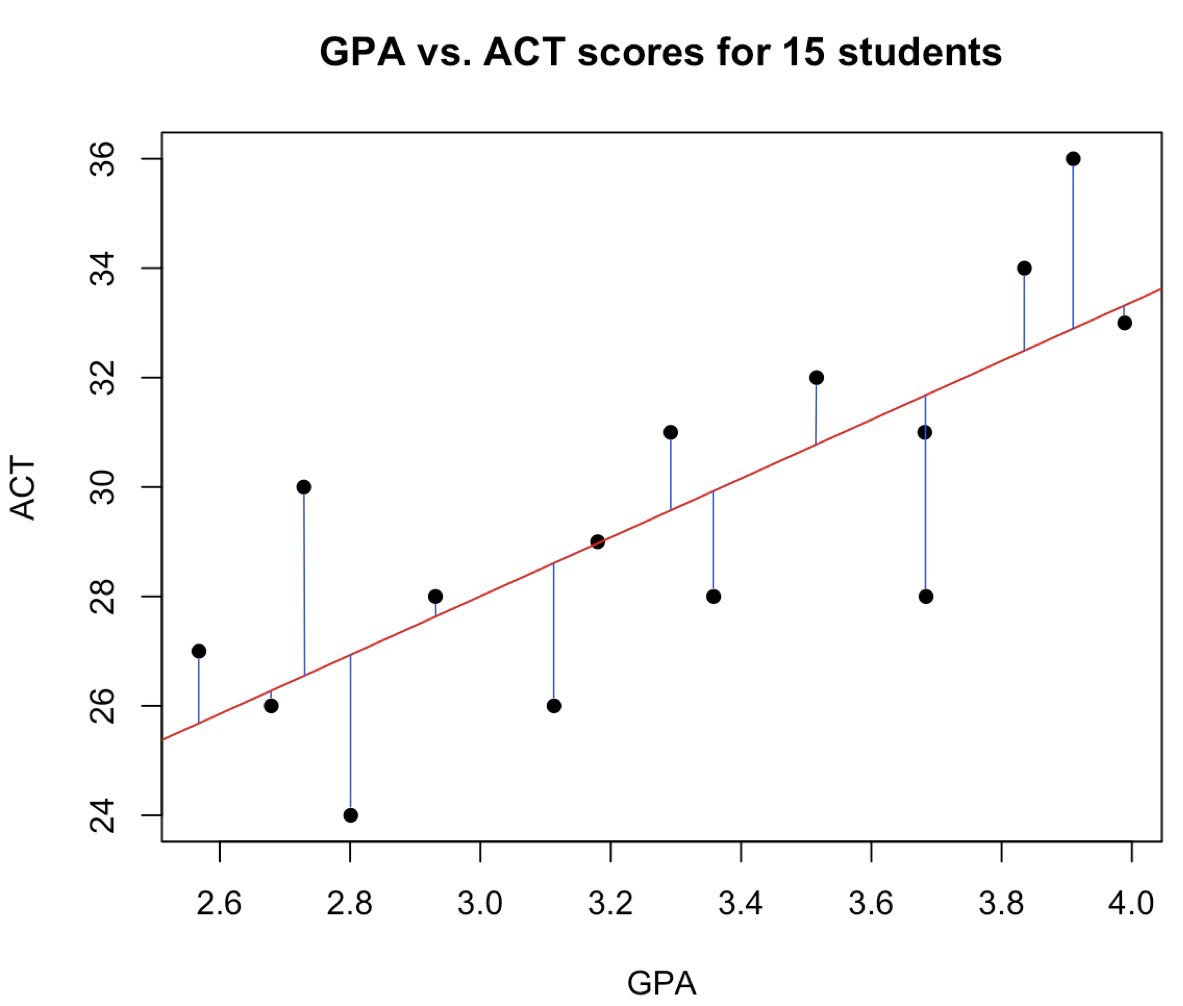

This photo is taken by: https://miro.medium.com/max/2366/1*tQkyTR9yxDcS1GKVFhdQQA.jpeg

### Principal Component Analysis (PCA) 

#### Theory

Principal Component Analysis, or PCA for short, is a method for reducing the dimensionality of data.

It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.

The PCA method can be described and implemented using the tools of linear algebra.

#### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [90]:
hts = pd.read_csv("Hitters.csv")
hts.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Now we will remove NA values.

In [91]:
hts.dropna(inplace=True)

In [92]:
hts.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


We will do **One Hot Encoding** to categorical columns.

In [93]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [94]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [95]:
new_hts.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [96]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [97]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [98]:
X.shape

(263, 19)

In [99]:
y.shape

(263,)

In [100]:
X_train = X.iloc[:200]
X_test = X.iloc[200:]
y_train = y[:200]
y_test = y[200:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (200, 19)
X_test Shape:  (63, 19)
y_train Shape:  (200,)
y_test Shape:  (63,)


Let's do dimensionality reduction.

In [101]:
pca = PCA()

In [102]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

In [103]:
X_reduced_train[:5]

array([[-0.20734617,  1.90225323,  1.18586022, -1.05691602, -0.73617579,
         1.39233919, -0.49250059, -0.03502036, -0.38427368, -0.5451096 ,
         0.28689857, -0.80502297, -0.3405726 ,  0.27142567, -0.11867173,
         0.12372502,  0.05853784, -0.03382087, -0.01148623],
       [ 0.42919978, -2.53723573, -0.31064271, -0.10692387, -1.13001336,
         2.29286939, -0.18778909,  1.08504905, -0.49014462,  0.08165734,
         0.13830876, -0.04016291,  0.38495629, -0.02677618, -0.02755964,
         0.14160341,  0.00624337, -0.03205239, -0.00695663],
       [ 3.28644219,  0.90175579,  0.19359382, -1.53919197,  0.92146129,
        -1.26707784, -0.69842099, -0.87711054,  0.1956631 ,  0.81098551,
        -0.01807494, -0.04005277, -0.0520347 , -0.43859559, -0.2246159 ,
        -0.04678025, -0.17619738, -0.03800044, -0.06429503],
       [-2.57117645, -0.36054003,  0.25655259, -2.11139788,  1.22913201,
         1.58852743, -0.62162344, -0.31816179,  0.32886983,  0.11813513,
        -0.065

Let's see cumulative explanatioon rates.

In [104]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)[:6]

array([36. , 60.6, 72.6, 80.4, 85.3, 89.3])

### Principal Component Regression(PCR)

#### Theory

In statistics, principal component regression (PCR) is a regression analysis technique that is based on principal component analysis (PCA). More specifically, PCR is used for estimating the unknown regression coefficients in a standard linear regression model.

We first perform principal components analysis (PCA) on the original data, then perform dimension reduction by selecting the number of principal components (m) using cross-validation or test set error, and finally conduct regression using the first m dimension reduced principal components.



#### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [105]:
hts = pd.read_csv("Hitters.csv")
hts.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Now we will remove NA values.

In [106]:
hts.dropna(inplace=True)

In [107]:
hts.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


We will do **One Hot Encoding** to categorical columns.

In [108]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [109]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [110]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [111]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [112]:
hts.shape

(263, 20)

In [113]:
#Independent Variables
X.shape

(263, 19)

In [114]:
#Dependent Variables
y.shape

(263,)

In [115]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (210, 19)
X_test Shape:  (53, 19)
y_train Shape:  (210,)
y_test Shape:  (53,)


Let's do dimensionality reduction.

In [116]:
pca = PCA()

In [117]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

Let's see cumulative explanatioon rates.

In [118]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)[:6]

array([34.5, 60. , 72.6, 81.5, 86.5, 90.4])

Let's create a model.

In [119]:
pcr = LinearRegression()
pcr_model = pcr.fit(X_reduced_train,y_train)

In [120]:
print("Intercept: ",pcr_model.intercept_)
print("Coefficients: ",pcr_model.coef_)

Intercept:  546.6944714285714
Coefficients:  [ 108.62906365  -24.35077093   23.95595793  -34.77184272  -83.14014623
   71.39286412    8.80356221   -9.69607076   54.01473132  136.14645851
    1.49578456   13.67658164   38.45645007 -264.2061819   170.91181041
  453.57803418 -410.34451125  673.85990715 -419.38631999]


#### Prediction

In [121]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[:10]

array([ 403.21993393,  758.41542239, 1182.40881941,  650.66137637,
        578.96379589,  190.88965559,  106.06128243,  193.0449271 ,
        657.00809147,  968.70200341])

In [122]:
#root mean square error for Train Set
np.sqrt(mean_squared_error(y_train,y_pred))

303.22898816258595

In [123]:
#r2 score for Train Set
r2_score(y_train,y_pred)

0.5752262816943401

In [124]:
y_pred = pcr_model.predict(X_reduced_test)
y_pred[:10]

array([ 504.53657011,  569.42395377,  194.53967032,  240.45906447,
        503.91439963, 1141.51766146,   33.93846198,  378.63296484,
       1320.04133275,  806.28367883])

In [125]:
#root mean square error for Test Set
np.sqrt(mean_squared_error(y_test,y_pred))

335.632324774888

In [126]:
#r2 score for Test Set
r2_score(y_test,y_pred)

0.22873295246020364

#### Model Tuning

In [127]:
pcr = LinearRegression()
pcr_model = pcr.fit(X_reduced_train,y_train)
y_pred = pcr_model.predict(X_reduced_test)
print("Root mean square error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error:  335.632324774888


Let's try different dimensions.

In [128]:
pcr_model = pcr.fit(X_reduced_train[:,:3],y_train)
y_pred = pcr_model.predict(X_reduced_test[:,:3])
print("Root mean square error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error:  302.6167604337664


In [129]:
cross_val = model_selection.KFold(n_splits=7,
                                  shuffle=True,
                                  random_state=45)
pcr = LinearRegression()
Root_mean_sqaure_error = []

In [130]:
X_reduced_train.shape

(210, 19)

In [131]:
for num in np.arange(X_reduced_train.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(pcr,X_reduced_train[:,:num],y_train.ravel(),
                                                       cv=cross_val,scoring="neg_mean_squared_error")).mean()
    
    Root_mean_sqaure_error.append(score)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 505, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse

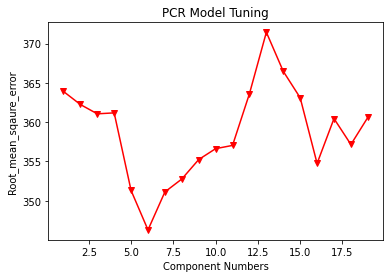

In [132]:
plt.plot(Root_mean_sqaure_error,"-v",c="r")
plt.xlabel("Component Numbers")
plt.ylabel("Root_mean_sqaure_error")
plt.title("PCR Model Tuning")

plt.show()

Optimum value seems 6. Now we will create a model with 6 components.

In [133]:
pcr = LinearRegression()
pcr_model = pcr.fit(X_reduced_train[:,:6],y_train)

In [134]:
y_pred = pcr_model.predict(X_reduced_train[:,:6])
print("Root mean square error for Train set: ",np.sqrt(mean_squared_error(y_train,y_pred)))

Root mean square error for Train set:  333.4936273726116


In [135]:
y_pred = pcr_model.predict(X_reduced_test[:,:6])
print("Root mean square error for Text set: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error for Text set:  289.76613807162045


### Shrinkage(Regularization) Methods

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Partial Least Squares, Ridge Regression, Lasso Regression, and Elastic Net, which implement four different ways to constrain the weights.

#### Partial Least Squares (PLS)

##### Theory

Partial Least Squares regression (PLS) is a quick, efficient and optimal regression method based on covariance. It is recommended in cases of regression where the number of explanatory variables is high, and where it is likely that the explanatory variables are correlated.

PLS helps to handle the case of a large number of correlated independent variables, which is common in chemometrics. Itis an alternative to ordinary least squares (OLS) regression. Firstly it extracts a set of latent factors that explain as much of the covariance as possible between the independent and dependent variables. Then a regression step predicts values of the dependent variables using the decomposition of the independent variables.

PLS is a supevised dimensiion reduction method.

##### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [136]:
hts = pd.read_csv("Hitters.csv")
hts.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Now we will remove NA values.

In [137]:
hts.dropna(inplace=True)

In [138]:
hts.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


We will do **One Hot Encoding** to categorical columns.

In [139]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [140]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [141]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [142]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [143]:
hts.shape

(263, 20)

In [144]:
#Independent Variables
X.shape

(263, 19)

In [145]:
#Dependent Variables
y.shape

(263,)

In [146]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (210, 19)
X_test Shape:  (53, 19)
y_train Shape:  (210,)
y_test Shape:  (53,)


In [147]:
pls_model = PLSRegression(n_components=7).fit(X_train,y_train)

In [148]:
pls_model.coef_

array([[-182.50759387],
       [ 169.37021424],
       [ -47.77506515],
       [  63.08891812],
       [  30.88901468],
       [  70.86551369],
       [ -97.2013175 ],
       [ -36.56263571],
       [  93.75294012],
       [ 126.62002648],
       [ 122.21898969],
       [ 155.47076042],
       [-150.91672409],
       [  84.28777431],
       [  72.6812175 ],
       [ -25.72515764],
       [  17.93140121],
       [ -92.7266382 ],
       [  23.7217116 ]])

##### Prediction

In [149]:
pls_model

PLSRegression(n_components=7)

In [150]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [151]:
pls_model.predict(X_train)[:10]

array([[ 342.37839948],
       [ 674.40578249],
       [1215.11323091],
       [ 633.48668554],
       [ 551.9388145 ],
       [ 256.98620543],
       [ 109.55958772],
       [ 174.82878563],
       [ 761.60266771],
       [ 965.67745006]])

In [152]:
y_pred=pls_model.predict(X_train)

In [153]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

313.32632336572675

In [154]:
r2_score(y_train,y_pred)

0.5464658750671466

In [155]:
y_pred=pls_model.predict(X_test)

In [156]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

333.730196918961

In [157]:
r2_score(y_test,y_pred)

0.23745017859177564

##### Model Tuning

In [158]:
pls_model

PLSRegression(n_components=7)

In [159]:
cross_val = model_selection.KFold(n_splits=15,
                                  shuffle=True,
                                  random_state=45)
Root_mean_sqaure_error = []

In [160]:
for num in np.arange(1,X_train.shape[1]+1):
    pls= PLSRegression(n_components=num)
    score = np.sqrt(-1*model_selection.cross_val_score(pls,X_train,y_train,
                                                       cv=cross_val,scoring="neg_mean_squared_error")).mean()
    
    Root_mean_sqaure_error.append(score)

In [161]:
len(Root_mean_sqaure_error)

19

In [162]:
X_train.shape[1]

19

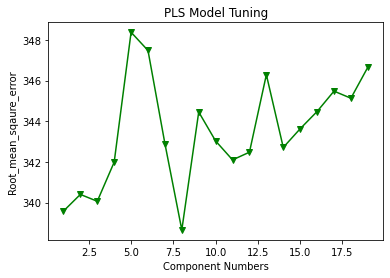

In [163]:
plt.plot(np.arange(1,X_train.shape[1]+1),np.array(Root_mean_sqaure_error),"-v",c="g")
plt.xlabel("Component Numbers")
plt.ylabel("Root_mean_sqaure_error")
plt.title("PLS Model Tuning")

plt.show()

Now we will create our last model with optimal value that seems 8.

In [164]:
pls_model = PLSRegression(n_components=8).fit(X_train,y_train)

In [165]:
y_pred=pls_model.predict(X_train)

In [166]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

309.05347867636664

In [167]:
r2_score(y_train,y_pred)

0.5587512609460972

In [168]:
y_pred=pls_model.predict(X_test)

In [169]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

330.6483176898801

In [170]:
r2_score(y_test,y_pred)

0.2514689001375435

#### Ridge Regression ( L2 Regularization)

##### Theory

Ridge Regression is a regularized version of Linear Regression. Ridge Regression, like Linear Regression, aims to minimize the Residual Sum of Squares(RSS) but with a slight change. While Linear Regression estimates the coefficients using the values that minimize the following equation:

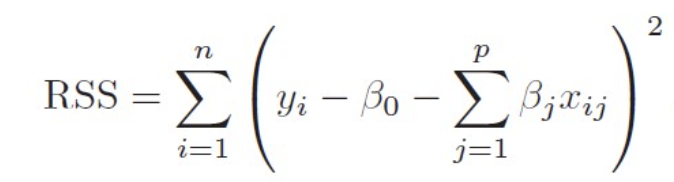

Photo is cited by here: http://busigence.com/blog/shrinkage-methods-in-linear-regression/

Ridge Regression adds a **penalty term(lambda 𝜆)** to this to shrink the coefficients to 0 :

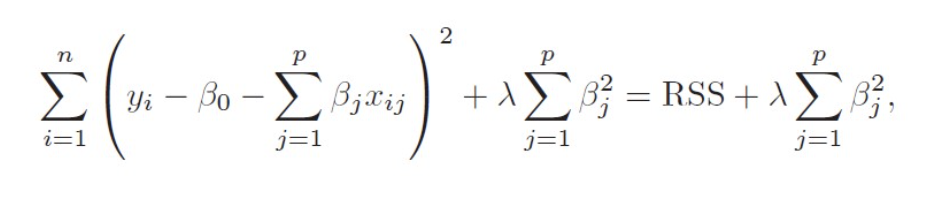

Photo is cited by here: http://busigence.com/blog/shrinkage-methods-in-linear-regression/

The hyperparameter *lambda(𝜆)* controls how much we want to regularize the model. If  𝜆 = 0, then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

##### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [171]:
hts = pd.read_csv("Hitters.csv")
hts.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Now we will remove NA values.

In [172]:
hts.dropna(inplace=True)

In [173]:
hts.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


We will do **One Hot Encoding** to categorical columns.

In [174]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [175]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [176]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [177]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [178]:
hts.shape

(263, 20)

In [179]:
#Independent Variables
X.shape

(263, 19)

In [180]:
#Dependent Variables
y.shape

(263,)

In [181]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (210, 19)
X_test Shape:  (53, 19)
y_train Shape:  (210,)
y_test Shape:  (53,)


In [182]:
ridge_model = Ridge(alpha=0.2).fit(X_train,y_train)

In [183]:
ridge_model

Ridge(alpha=0.2)

In [184]:
ridge_model.coef_

array([  -2.41189039,    8.91147063,    2.84201352,   -1.49426997,
         -1.05226295,    5.6084127 ,    0.60105755,   -0.16107707,
         -0.28338429,   -0.8960649 ,    1.88742486,    1.26712845,
         -0.87338654,    0.41711639,    0.63419076,   -2.87772869,
         18.86699972, -128.26622009,   50.77669259])

In [185]:
lambda_values= 10**np.linspace(5,-2,150)*0.5
ridge_model = Ridge()
coefficients = []

for lam in lambda_values:
    ridge_model.set_params(alpha=lam)
    ridge_model.fit(X_train,y_train)
    coefficients.append(ridge_model.coef_)

In [186]:
lambda_values[:10]

array([50000.        , 44873.52004792, 40272.65602982, 36143.51675475,
       32437.73647393, 29111.90835944, 26127.07606801, 23448.27743463,
       21044.13495104, 18886.48823234])

In [187]:
coefficients[:3]

[array([-0.51724961,  2.20034745, -0.07801802,  0.99088638,  0.26928077,
         1.57081143,  0.04971685, -0.33176435,  0.64136127, -0.06561597,
         1.07674083,  0.88778441, -0.30484539,  0.42449213,  0.46254923,
        -0.38833383,  0.05430532, -0.13718731,  0.05497141]),
 array([-0.58776623,  2.3690747 , -0.09175069,  1.03451326,  0.27434366,
         1.68190105,  0.05564627, -0.32840644,  0.62274636, -0.08593127,
         1.09578385,  0.89759135, -0.32073582,  0.42520274,  0.46880314,
        -0.42381594,  0.06056795, -0.15220841,  0.06142064]),
 array([-0.66066079,  2.54674474, -0.10672988,  1.07557019,  0.27883687,
         1.79682549,  0.0620108 , -0.32465588,  0.60280013, -0.10630167,
         1.11510592,  0.90723351, -0.33701251,  0.42591673,  0.47500509,
        -0.4615529 ,  0.06753149, -0.16885879,  0.06860893])]

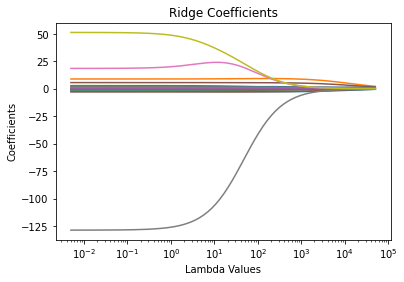

In [188]:
ax = plt.gca()
ax.plot(lambda_values,coefficients)
ax.set_xscale("log")

plt.xlabel("Lambda Values")
plt.ylabel("Coefficients")
plt.title("Ridge Coefficients")
plt.show()

##### Prediction

In [189]:
ridge_model

Ridge(alpha=0.005)

In [190]:
ridge_model.predict(X_train)[:10]

array([ 403.22327979,  758.42456908, 1182.39938932,  650.65312842,
        578.97168623,  190.89240803,  106.06933525,  193.04720572,
        657.00170616,  968.69758572])

In [191]:
y_pred=ridge_model.predict(X_train)

In [192]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

303.2289882531757

In [193]:
r2_score(y_train,y_pred)

0.5752262814405376

In [194]:
y_pred=ridge_model.predict(X_test)

In [195]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

336.9858128683326

In [196]:
r2_score(y_test,y_pred)

0.22249990795089036

##### Model Tuning

In [197]:
lambda_values= 10**np.linspace(5,-2,150)*0.5

In [198]:
lambda_values[:10]

array([50000.        , 44873.52004792, 40272.65602982, 36143.51675475,
       32437.73647393, 29111.90835944, 26127.07606801, 23448.27743463,
       21044.13495104, 18886.48823234])

In [199]:
Ridge_cv = RidgeCV(alphas=lambda_values,
                   scoring="neg_mean_squared_error",
                   normalize=True)

In [200]:
Ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+04, 4.48735200e+04, 4.02726560e+04, 3.61435168e+04,
       3.24377365e+04, 2.91119084e+04, 2.61270761e+04, 2.34482774e+04,
       2.10441350e+04, 1.88864882e+04, 1.69500642e+04, 1.52121809e+04,
       1.36524821e+04, 1.22526986e+04, 1.09964343e+04, 9.86897429e+03,
       8.85711232e+03, 7.94899614e+03, 7.13398876e+03, 6.40254375e+03,
       5.74609351e+03, 5.15694884e+0...
       4.84782781e-02, 4.35078197e-02, 3.90469804e-02, 3.50435091e-02,
       3.14505122e-02, 2.82259038e-02, 2.53319132e-02, 2.27346423e-02,
       2.04036685e-02, 1.83116886e-02, 1.64341985e-02, 1.47492067e-02,
       1.32369765e-02, 1.18797946e-02, 1.06617640e-02, 9.56861760e-03,
       8.58755108e-03, 7.70707291e-03, 6.91686981e-03, 6.20768593e-03,
       5.57121438e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [201]:
Ridge_cv.alpha_

0.009568617603791272

Now we will create our last model with optimal alpha value that seems 0.009568617603791272.

In [202]:
ridge_tuned = Ridge(alpha=Ridge_cv.alpha_,normalize=True).fit(X_train,y_train)

In [203]:
y_pred=ridge_tuned.predict(X_train)

In [204]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

306.6077508440482

In [205]:
r2_score(y_train,y_pred)

0.5657073660567311

In [206]:
y_pred=ridge_tuned.predict(X_test)

In [207]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

327.87513556679505

In [208]:
r2_score(y_test,y_pred)

0.2639722635189039

#### Lasso Regression( L1 Regularization)

##### Theory

Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm. This penalty allows some coefficient values to go to the value of zero, allowing input variables to be effectively removed from the model, providing a type of automatic feature selection.

This is the cost function of Lasso regression:

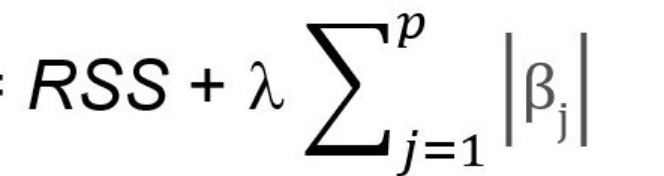

Photo is cited by: https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fgeekculture%2Fridge-and-lasso-regression-51705b608fb9&psig=AOvVaw2KdB1GWJI9AWSkW5SyaXKy&ust=1626716220613000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCJCY8YOV7fECFQAAAAAdAAAAABAD

##### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [209]:
hts = pd.read_csv("Hitters.csv")
hts.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Now we will remove NA values.

In [210]:
hts.dropna(inplace=True)

In [211]:
hts.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


We will do **One Hot Encoding** to categorical columns.

In [212]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [213]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [214]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [215]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [216]:
hts.shape

(263, 20)

In [217]:
#Independent Variables
X.shape

(263, 19)

In [218]:
#Dependent Variables
y.shape

(263,)

In [219]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (210, 19)
X_test Shape:  (53, 19)
y_train Shape:  (210,)
y_test Shape:  (53,)


In [220]:
lasso_model = Lasso(alpha=0.1).fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9654454.536722869, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(


In [221]:
lasso_model

Lasso(alpha=0.1)

In [222]:
lasso_model.coef_

array([  -2.36728845,    8.69562348,    2.6253349 ,   -1.2995984 ,
         -1.01285484,    5.51874641,    1.35831429,   -0.18352931,
         -0.16612724,   -0.72026897,    1.80604429,    1.20306017,
         -0.84327277,    0.41573214,    0.64198626,   -2.94444835,
         19.81585838, -128.16251762,   49.86209437])

In [223]:
lambda_values= 10**np.linspace(5,-2,150)*0.5
lasso_model = Lasso()
coefficients = []

for lam in lambda_values:
    lasso_model.set_params(alpha=lam)
    lasso_model.fit(X_train,y_train)
    coefficients.append(lasso_model.coef_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4741.4905441477895, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5852.535247590393, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5668.0616027750075, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8512319.305686789, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8726125.050835155, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8882989.324428681, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarnin

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9646312.752961509, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9647403.855186518, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9648362.51889733, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9655532.841599336, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9655575.620959532, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9655613.968085242, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarnin

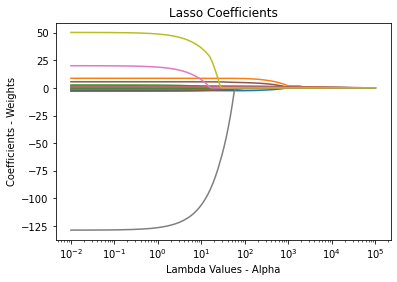

In [224]:
ax = plt.gca()
ax.plot(lambda_values*2,coefficients)
ax.set_xscale("log")

plt.axis("tight")
plt.xlabel("Lambda Values - Alpha")
plt.ylabel("Coefficients - Weights")
plt.title("Lasso Coefficients")
plt.show()

##### Prediction

In [225]:
lasso_model

Lasso(alpha=0.005)

In [226]:
lasso_model.predict(X_train)[:10]

array([ 400.7827288 ,  756.98597514, 1176.65551163,  649.19511665,
        570.48964377,  193.87333341,  107.02884517,  194.67623188,
        655.19484968,  971.39228125])

In [227]:
y_pred=lasso_model.predict(X_train)

In [228]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

303.251388887823

In [229]:
r2_score(y_train,y_pred)

0.5751635199453824

In [230]:
y_pred=lasso_model.predict(X_test)

In [231]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

336.6329836759592

In [232]:
r2_score(y_test,y_pred)

0.22412716410250244

##### Model Tuning

In [233]:
Lasso_cv = LassoCV(alphas=None,
                   cv=15,
                   max_iter=15000,
                   normalize=True)

In [234]:
Lasso_cv.fit(X_train,y_train)

LassoCV(cv=15, max_iter=15000, normalize=True)

In [235]:
Lasso_cv.alpha_

0.07340278835886885

Now we will create our last model with optimal alpha value that seems 0.07340278835886885.

In [236]:
lasso_tuned = Lasso(alpha=Lasso_cv.alpha_).fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9654858.0141913, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(


In [237]:
y_pred=lasso_tuned.predict(X_train)

In [238]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

303.2514234667017

In [239]:
r2_score(y_train,y_pred)

0.575163423059627

In [240]:
y_pred=lasso_tuned.predict(X_test)

In [241]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

336.5698762152672

In [242]:
r2_score(y_test,y_pred)

0.22441803741182342

#### Elastic Net Regression

##### Theory

Elastic-Net Regression is combines Lasso Regression with Ridge Regression to give you the best of both worlds. It works well when there are lots of useless variables that need to be removed from the equation and it works well when there are lots of useful variables that need to be retained. And it does better than either one when it comes to handling correlated variables. 

 Elastic Net aims at minimizing the following loss function:

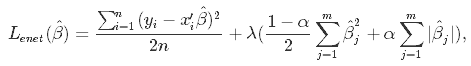

Photo is cited by: https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

##### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [246]:
hts = pd.read_csv("Hitters.csv")
hts.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Now we will remove NA values.

In [247]:
hts.dropna(inplace=True)

In [248]:
hts.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


We will do **One Hot Encoding** to categorical columns.

In [249]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [250]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [251]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [252]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [253]:
hts.shape

(263, 20)

In [254]:
#Independent Variables
X.shape

(263, 19)

In [255]:
#Dependent Variables
y.shape

(263,)

In [256]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (210, 19)
X_test Shape:  (53, 19)
y_train Shape:  (210,)
y_test Shape:  (53,)


In [257]:
elastic_net_model = ElasticNet().fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9964166.327909471, tolerance: 4545.724279285033
  model = cd_fast.enet_coordinate_descent(


In [258]:
elastic_net_model

ElasticNet()

In [259]:
elastic_net_model.coef_

array([ -2.57038767,   9.08966777,   1.49845497,  -1.13947762,
        -0.34885378,   5.42445699,   1.6561179 ,  -0.18568568,
        -0.15639425,  -0.61738565,   1.84946479,   1.10766503,
        -0.8168196 ,   0.43065118,   0.63692288,  -2.84916177,
        13.1999717 , -39.32827371,  14.65618016])

In [260]:
elastic_net_model.intercept_

97.1698547030835

##### Prediction

In [261]:
elastic_net_model

ElasticNet()

In [262]:
elastic_net_model.predict(X_train)[:10]

array([ 420.3065126 ,  825.64586434, 1104.11471575,  589.46201287,
        630.36531273,  153.49242813,  164.95214949,  208.627058  ,
        620.66917997,  949.44403372])

In [263]:
y_pred=elastic_net_model.predict(X_train)

In [264]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

306.74633648485917

In [265]:
r2_score(y_train,y_pred)

0.5653146797994274

In [266]:
y_pred=elastic_net_model.predict(X_test)

In [267]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

330.1719387567114

In [268]:
r2_score(y_test,y_pred)

0.25362422683742336

##### Model Tuning

In [269]:
elastic_net_cv = ElasticNetCV(cv=15,random_state=42)

In [270]:
elastic_net_cv.fit(X_train,y_train)

ElasticNetCV(cv=15, random_state=42)

In [271]:
elastic_net_cv.alpha_

1116.4729085556469

Now we will create our last model with optimal alpha value that seems 1116.4729085556469.

In [273]:
elastic_net_tuned = ElasticNet(alpha=elastic_net_cv.alpha_).fit(X_train,y_train)

In [274]:
y_pred=elastic_net_tuned.predict(X_train)

In [275]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

326.9160736762325

In [276]:
r2_score(y_train,y_pred)

0.50627086776619

In [277]:
y_pred=elastic_net_tuned.predict(X_test)

In [278]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

328.92750084588874

In [279]:
r2_score(y_test,y_pred)

0.25923989439099737

### Summary



| Model | Train Error | Test Error |
| --- | --- | --- |
| Partial Least Squares(PLS) | 309.05 | 330.64 |
| Ridge Regression(L2 Regularization) | 306.60 | 327.87 |
| Lasso Regression(L1 Regularization) | 303.25 | 336.56 |
| Elastic Net Regression | 326.91 | 328.92 |
